# 4. 4. (Thurs) Sound   2017130772 정준영

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor : creating (sine) wave

* 모든 소리는 단순한 sin wave의 합(다양한 sin wave를 합하면 여러 소리를 만들어 낼 수 있음)
* sin wave는 어떤 요소로 구성되는가? 얼마나 빨리 왔다갔다 하는가(sin wave의 빠르기) = freq - 소리의 높낮이를 결정, 크기는(진폭은) 얼마인가 = amplitude -강도, 강도와 높낮이는 서로 독립적이다.

### srate
* srate = sampling rate, 단위 Hz, 연속적인 값을 얼마나 잘게 쪼갤 것인가, 즉 "1초에" 몇 개를 담을 것인가(몇 번 있는가), 잘게 쪼갤수록 완전한 정보에 가까워짐(사람의 가청주파수 2만의 2배쯤으로 sr을 잡으면 모든 소리를 full로 다 들을 수 있음.
* srate가 정의되지 않으면 아무 것도 표시할 수 없음. 소리란 physical area에서 시간적 개념없이 이루어 질 수 없기 때문 - 소리를 generate하려면 x축이 시간 축이어야 함.

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz 
dur = 1        # in seconds
freq = 100.0     
# frequency, Hz : srate와 같은 단위 사용하지만, 다른 개념, 1초에 사인곡선이 몇번 반복되는가, 소리의 높낮이와 관련됨.(고주파=high frequency)

### time

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr  # 시간 = 1부터 10000까지 정수를 sr로 나눔,즉 만분의 1초부터 10000분의 10000초, 즉 1초까지 만듦
# 가장 마지막 요소는 포함이 안되므로 +1 해주어야 함 
len(t)

10000

* generating time example

t = np.arange(1, sr+1)/sr : 만분의 1초부터 1초(만분의 만)까지의 나열을 생성

t = np.arange(1, sr * 0.5+1)/sr : 만분의 1초부터 만분의 오천초, 즉 0.5초까지의 나열 생성

### generating theta 
* 시간과 각도를 연결시켜야 sin함수의 입력값으로 넣을 수 있음. 그저 시간값은 sin 함수에 넣어줄 수 없음. freq개념 이용해서 두 개념을 연결시킴.

In [5]:
# generate phase
theta = t * 2*np.pi * freq    # 시간 * 2 pi * freq = theta / theta와 time의 size는 동일-시간에 탁탁 맞춰진 각도값이 theta에 존재

* generating phase example

 - dur=1, freq = 1,

   theta = t * 2* pi  : 시간(0에서 1초)에 2pi곱함 = 0부터 2pi까지로 범위변경 - 쪼개짐은 만개(srate) (2pi는 한바퀴 도는 것)  

 - dur = 1, freq = 2, - 0부터 4pi까지 가는 것 (즉, 두바퀴 돌게됨)

### sine function
* sin 함수의 입력값(input)은 각도(radian값). / degree 방법이 아닌 radian 방법 사용 = 360도는 2pi radian / 180도는 pi radian

 sin(45) 는 불가, sin(pi/4)로 입력해야 함, 각도 * pi/180 = radian 값

In [6]:
# generate signal by cosine-phasor   # numpy 안에 sin wave 함수 존재 # t, theta, s의 size는 모두 동일 - 현재 만개
s = np.sin(theta)

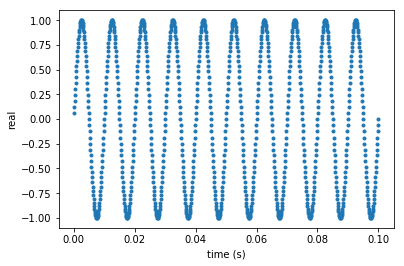

In [7]:
# ploting
fig = plt.figure()  # 큰 틀 제작
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') # 입력값 2개(x축, y축) = 시간, sin wave  # ploting에는 theta가 사용되지 않음.(convert용으로 이용)
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate = sr)  # 소리로 play할 수 있는 프로그램, 시그널과 srate 입력값으로 줌

* np.sin 대신 np.exp 사용

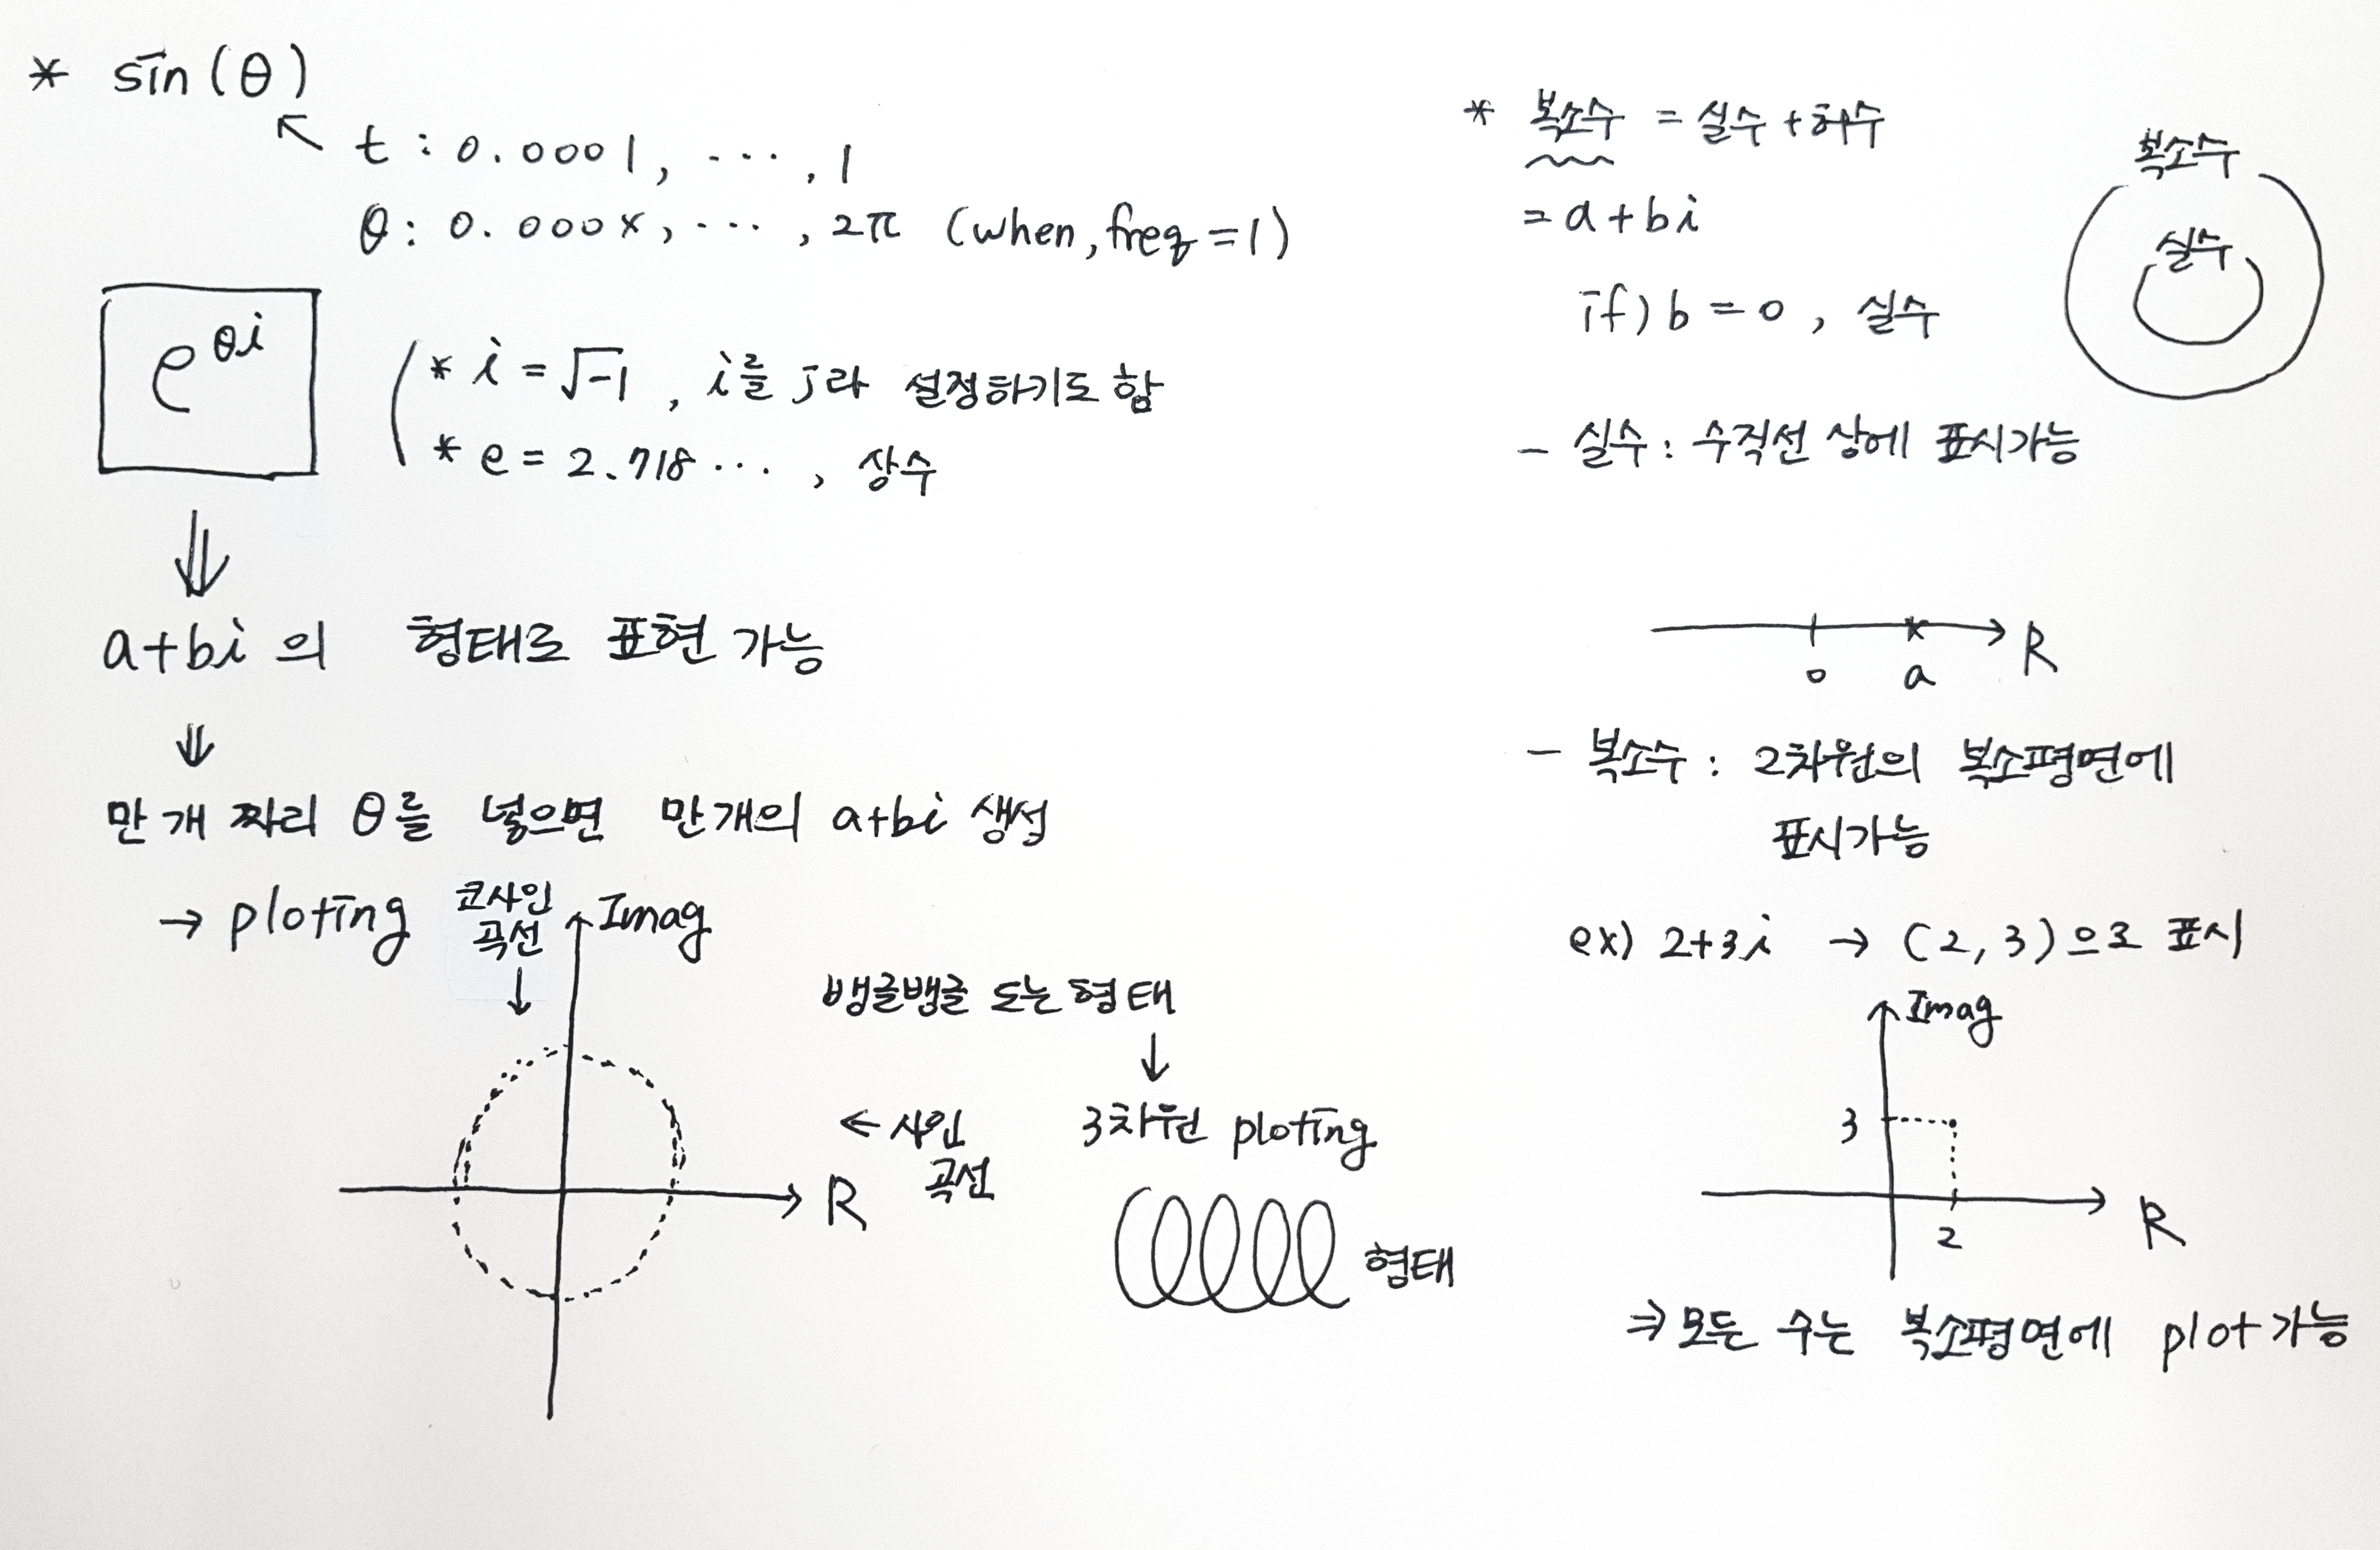

In [8]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'imag')

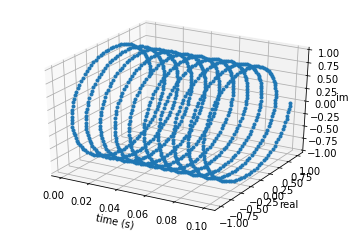

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [74]:
ipd.Audio(s, rate=sr)

# Generate pulse train

<IPython.core.display.Javascript object>


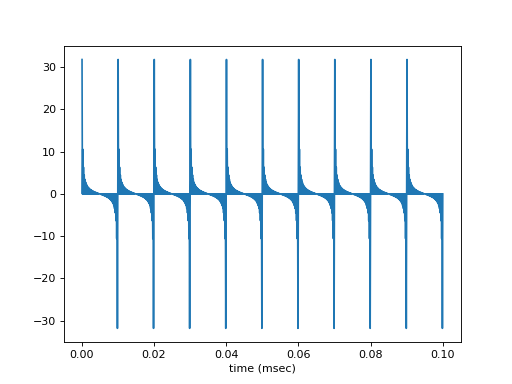

In [125]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

In [79]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [126]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [127]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [128]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [129]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [130]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [131]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [132]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [133]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


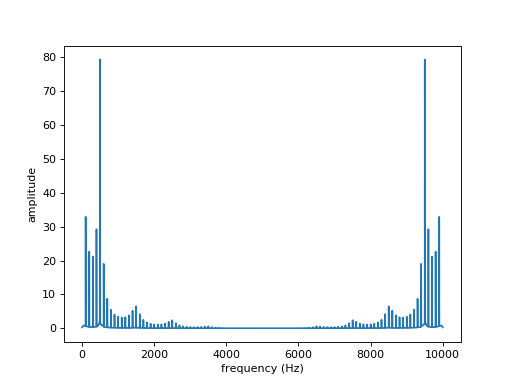

Text(0, 0.5, 'amplitude')

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [100]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [101]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

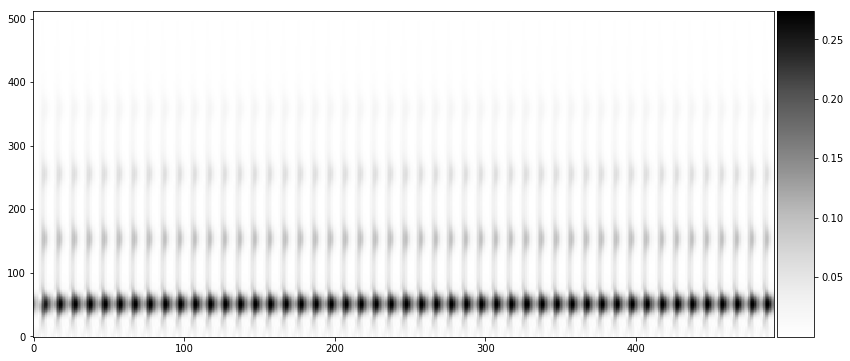

In [102]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

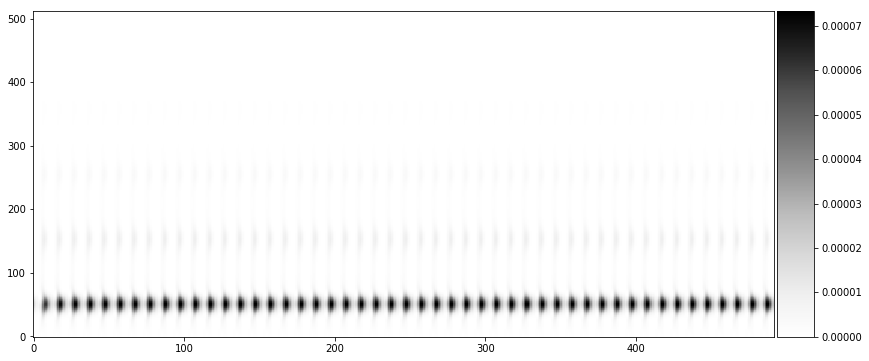

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

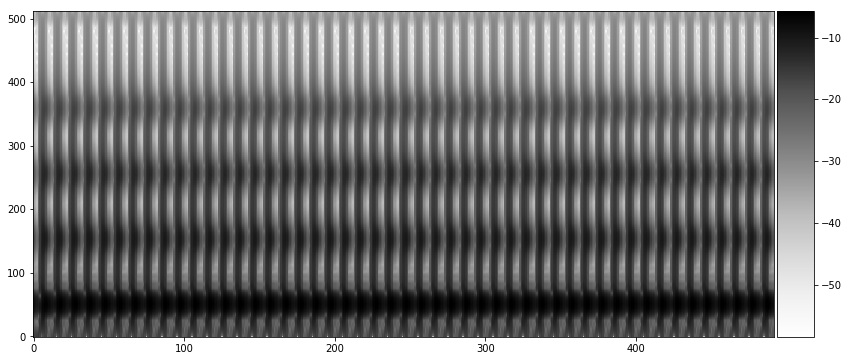

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

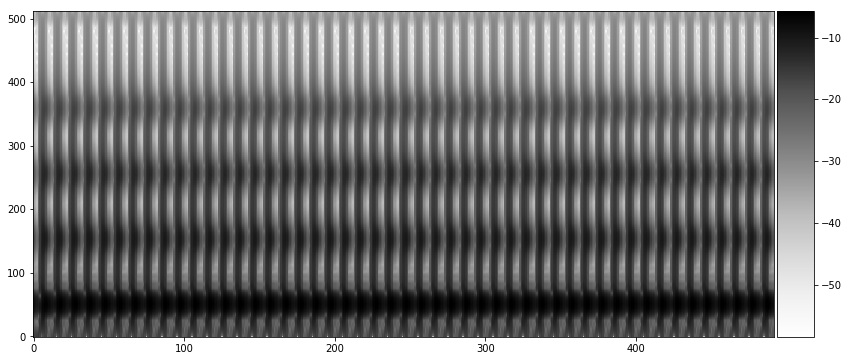

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

# Practice

In [10]:
amp = 1
sr = 10000
dur = 2
freq = 200

In [12]:
t = np.arange(1, sr*dur+1)/sr
len(t)

20000

In [14]:
theta = t * 2*np.pi*freq
len(theta)

20000

In [15]:
wave = np.sin(theta)

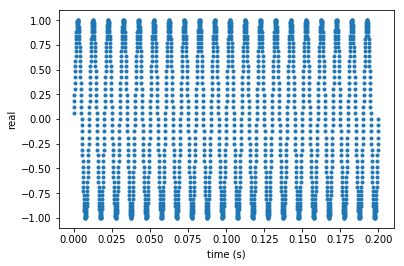

In [17]:
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(t[0:2000], s[0:2000], '.')
axis.set_xlabel('time (s)')
axis.set_ylabel('real')
ipd.Audio(s, rate = sr) 